In [65]:
#loading pandas package to load and clean the data
import pandas as pd
#importing libraries needed for regression and visualization
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pylab as plt
import datetime as dt
# suppress warning
import warnings
import geopandas as gpd
from scipy.stats import shapiro

warnings.filterwarnings('ignore')

#Clear the Charging stations data

In [3]:
data2 = pd.read_csv('Electric_Vehicle_Charging_Stations_in_New_York_20240220.csv')

In [4]:
data = pd.read_csv('NYC_EV_Fleet_Station_Network_20240220.csv')

In [5]:
data.head()

,STATION NAME,AGENCY,NO. OF PLUGS,TYPE OF CHARGER,ADDRESS,CITY,POSTCODE,BOROUGH,LATITUDE,LONGITUDE,COMMUNITY DISTRICT,COUNCIL DISTRICT,CENSUS TRACT 2020,BIN,BBL,NEIGHBORHOOD TABULATION AREA (NTA) (2020)
0,NYC FLEET / ACS_LINDEN_1_L3,ACS,1,Level 3 Fast Charger,2554 Linden Blvd,East New York,11208.0,Brooklyn,40.668034,-73.869949,305.0,42.0,1220.0,3098733.0,3.044840e+09,BK0505
1,NYC FLEET / ACS_LINDEN_2_L3,ACS,1,Level 3 Fast Charger,2554 Linden Blvd,East New York,11208.0,Brooklyn,40.668034,-73.869949,305.0,42.0,1220.0,3098733.0,3.044840e+09,BK0505
2,NYC FLEET / ACS_LINDEN-1,ACS,1,Level 2 Charger,2554 Linden Blvd,Brooklyn,11208.0,Brooklyn,40.668034,-73.869949,305.0,42.0,1220.0,3098733.0,3.044840e+09,BK0505
3,NYC FLEET / ACSSTMARKSPL1,ACS,1,Level 2 Charger,350 St Marks Pl,Staten Island,10301.0,Staten Island,40.640708,-74.077697,501.0,49.0,3.0,5000185.0,5.000160e+09,SI0101
4,NYC FLEET / CITYHALL EAST,CITYHALL,2,Level 2 Charger,New York City Hall,New York,10007.0,Manhattan,40.712806,-74.006096,101.0,1.0,31.0,1079147.0,1.001220e+09,MN0102


In [6]:
data2.head()

,Fuel Type Code,Station Name,Street Address,Intersection Directions,City,State,ZIP,Plus4,Station Phone,Status Code,...,Latitude,Longitude,Date Last Confirmed,ID,Updated At,Owner Type Code,Federal Agency ID,Federal Agency Name,Open Date,EV Connector Types
0,ELEC,Avon,74 Genesee Street,NaN,Avon,NY,14414,NaN,866-816-7584,E,...,42.910944,-77.746320,02/20/2024,123132,2024-02-20 02:18:57,NaN,NaN,NaN,04/01/2019,J1772
1,ELEC,Dino's Tailor Shop,2400 Monroe Av,NaN,Rochester,NY,14618,NaN,888-356-8911,E,...,43.118929,-77.556073,02/20/2024,152919,2024-02-20 02:29:03,NaN,NaN,NaN,01/23/2020,J1772
2,ELEC,PICOTTE 22 CORPORATE 4,22 Corporate Woods Blvd,NaN,Albany,NY,12211,NaN,888-758-4389,E,...,42.681427,-73.768380,02/20/2024,165498,2024-02-20 01:26:20,NaN,NaN,NaN,08/26/2020,J1772
3,ELEC,Albany Parking Authority - Riverfront Garage,"2 Columbia St,",NaN,Albany,NY,12207,NaN,866-816-7584,E,...,42.650590,-73.749073,02/20/2024,185449,2024-02-20 02:19:21,NaN,NaN,NaN,05/02/2019,J1772
4,ELEC,1065 Elton St,1065 Elton St,NaN,Brooklyn,NY,11239,NaN,888-356-8911,E,...,40.657441,-73.874619,02/20/2024,196329,2024-02-20 02:28:51,NaN,NaN,NaN,09/24/2021,J1772


In [7]:
data2['Open Date'] =pd.to_datetime(data2['Open Date'])

In [8]:
data2['Year'] = data2['Open Date'].dt.year
data2['Month'] = data2['Open Date'].dt.month

In [9]:
data2.head()

,Fuel Type Code,Station Name,Street Address,Intersection Directions,City,State,ZIP,Plus4,Station Phone,Status Code,...,Date Last Confirmed,ID,Updated At,Owner Type Code,Federal Agency ID,Federal Agency Name,Open Date,EV Connector Types,Year,Month
0,ELEC,Avon,74 Genesee Street,NaN,Avon,NY,14414,NaN,866-816-7584,E,...,02/20/2024,123132,2024-02-20 02:18:57,NaN,NaN,NaN,2019-04-01,J1772,2019,4
1,ELEC,Dino's Tailor Shop,2400 Monroe Av,NaN,Rochester,NY,14618,NaN,888-356-8911,E,...,02/20/2024,152919,2024-02-20 02:29:03,NaN,NaN,NaN,2020-01-23,J1772,2020,1
2,ELEC,PICOTTE 22 CORPORATE 4,22 Corporate Woods Blvd,NaN,Albany,NY,12211,NaN,888-758-4389,E,...,02/20/2024,165498,2024-02-20 01:26:20,NaN,NaN,NaN,2020-08-26,J1772,2020,8
3,ELEC,Albany Parking Authority - Riverfront Garage,"2 Columbia St,",NaN,Albany,NY,12207,NaN,866-816-7584,E,...,02/20/2024,185449,2024-02-20 02:19:21,NaN,NaN,NaN,2019-05-02,J1772,2019,5
4,ELEC,1065 Elton St,1065 Elton St,NaN,Brooklyn,NY,11239,NaN,888-356-8911,E,...,02/20/2024,196329,2024-02-20 02:28:51,NaN,NaN,NaN,2021-09-24,J1772,2021,9


In [10]:
yearly_counts = data2['Year'].value_counts().sort_index()
yearly_counts

Year
2010      3
2011     33
2012     10
2013      7
2014     29
2015     87
2016    129
2017    133
2018    166
2019    303
2020    486
2021    836
2022    839
2023    659
2024     72
Name: count, dtype: int64

In [11]:
years_to_keep = [2016,2017,2018,2019, 2020, 2021,2022,2023]
EV_station_16_23 = data2[data2['Year'].isin(years_to_keep)]

In [12]:
EV_station_16_23.head()

,Fuel Type Code,Station Name,Street Address,Intersection Directions,City,State,ZIP,Plus4,Station Phone,Status Code,...,Date Last Confirmed,ID,Updated At,Owner Type Code,Federal Agency ID,Federal Agency Name,Open Date,EV Connector Types,Year,Month
0,ELEC,Avon,74 Genesee Street,NaN,Avon,NY,14414,NaN,866-816-7584,E,...,02/20/2024,123132,2024-02-20 02:18:57,NaN,NaN,NaN,2019-04-01,J1772,2019,4
1,ELEC,Dino's Tailor Shop,2400 Monroe Av,NaN,Rochester,NY,14618,NaN,888-356-8911,E,...,02/20/2024,152919,2024-02-20 02:29:03,NaN,NaN,NaN,2020-01-23,J1772,2020,1
2,ELEC,PICOTTE 22 CORPORATE 4,22 Corporate Woods Blvd,NaN,Albany,NY,12211,NaN,888-758-4389,E,...,02/20/2024,165498,2024-02-20 01:26:20,NaN,NaN,NaN,2020-08-26,J1772,2020,8
3,ELEC,Albany Parking Authority - Riverfront Garage,"2 Columbia St,",NaN,Albany,NY,12207,NaN,866-816-7584,E,...,02/20/2024,185449,2024-02-20 02:19:21,NaN,NaN,NaN,2019-05-02,J1772,2019,5
4,ELEC,1065 Elton St,1065 Elton St,NaN,Brooklyn,NY,11239,NaN,888-356-8911,E,...,02/20/2024,196329,2024-02-20 02:28:51,NaN,NaN,NaN,2021-09-24,J1772,2021,9


In [13]:
EV_station_16_23.columns

Index(['Fuel Type Code', 'Station Name', 'Street Address',
       'Intersection Directions', 'City', 'State', 'ZIP', 'Plus4',
       'Station Phone', 'Status Code', 'Expected Date',
       'Groups With Access Code', 'Access Days Time', 'Cards Accepted',
       'EV Level1 EVSE Num', 'EV Level2 EVSE Num', 'EV DC Fast Count',
       'EV Other Info', 'EV Network', 'EV Network Web', 'Geocode Status',
       'Latitude', 'Longitude', 'Date Last Confirmed', 'ID', 'Updated At',
       'Owner Type Code', 'Federal Agency ID', 'Federal Agency Name',
       'Open Date', 'EV Connector Types', 'Year', 'Month'],
      dtype='object')

In [14]:
columns_to_drop = ['Plus4', 'Intersection Directions', 'Station Phone','EV Level1 EVSE Num','Status Code','Expected Date','Groups With Access Code','Access Days Time','Cards Accepted','EV Other Info','EV Network','EV Network Web','Geocode Status','Date Last Confirmed','ID','Updated At','Owner Type Code','Federal Agency ID','Federal Agency Name','EV Connector Types']
EV_station_16_23.drop(columns=columns_to_drop, inplace=True)


In [15]:
EV_station_16_23.head()

,Fuel Type Code,Station Name,Street Address,City,State,ZIP,EV Level2 EVSE Num,EV DC Fast Count,Latitude,Longitude,Open Date,Year,Month
0,ELEC,Avon,74 Genesee Street,Avon,NY,14414,2.0,NaN,42.910944,-77.746320,2019-04-01,2019,4
1,ELEC,Dino's Tailor Shop,2400 Monroe Av,Rochester,NY,14618,1.0,NaN,43.118929,-77.556073,2020-01-23,2020,1
2,ELEC,PICOTTE 22 CORPORATE 4,22 Corporate Woods Blvd,Albany,NY,12211,2.0,NaN,42.681427,-73.768380,2020-08-26,2020,8
3,ELEC,Albany Parking Authority - Riverfront Garage,"2 Columbia St,",Albany,NY,12207,5.0,NaN,42.650590,-73.749073,2019-05-02,2019,5
4,ELEC,1065 Elton St,1065 Elton St,Brooklyn,NY,11239,4.0,NaN,40.657441,-73.874619,2021-09-24,2021,9


Clear the air quality data

In [16]:
import os
folder_path = 'C:/Users/11491/Downloads/annual_conc_by_monitor'
#记得改成自己的路径
all_years_data = pd.DataFrame()
for year in range(2016, 2024):
    file_name = f'annual_conc_by_monitor_{year}.csv'
    file_path = os.path.join(folder_path, file_name)
    if os.path.exists(file_path):
        df = pd.read_csv(file_path)
        
        df['Year'] = year
    
        all_years_data = pd.concat([all_years_data, df], ignore_index=True)
    else:
        print(f'File {file_name} does not exist.')

print(all_years_data)


        State Code  County Code  Site Num  Parameter Code  POC   Latitude  \
0                1            3        10           44201    1  30.497478   
1                1            3        10           44201    1  30.497478   
2                1            3        10           44201    1  30.497478   
3                1            3        10           44201    1  30.497478   
4                1            3        10           68101    1  30.497478   
...            ...          ...       ...             ...  ...        ...   
587683          80           26         6           88101    1  31.291293   
587684          80           26      8012           44201    1  32.466389   
587685          80           26      8012           44201    1  32.466389   
587686          80           26      8012           44201    1  32.466389   
587687          80           26      8012           44201    1  32.466389   

         Longitude  Datum            Parameter Name          Sample Duratio

In [17]:
#keep useful parameters
col_keep=['Latitude','Longitude','Parameter Name', 'Year', 'Units of Measure', 'Arithmetic Mean', 'State Name',
       'County Name', 'City Name']
air_data=all_years_data.loc[:,col_keep]

In [18]:
#keep data inside new york, and parameters useful for greenhouse gas
air_data=air_data.loc[air_data['State Name']=='New York']
county=['Bronx', 'Kings', 'New York', 'Queens', 'Richmond']
air_data=air_data.loc[air_data['County Name'].isin(county)]
parameter=['PM2.5 - Local Conditions', 'Sulfur dioxide', 'Nitrogen dioxide (NO2)']
air_data=air_data.loc[air_data['Parameter Name'].isin(parameter)]
air_data

,Latitude,Longitude,Parameter Name,Year,Units of Measure,Arithmetic Mean,State Name,County Name,City Name
45779,40.81600,-73.90200,Sulfur dioxide,2016,Parts per billion,1.508197,New York,Bronx,New York
45780,40.81600,-73.90200,Sulfur dioxide,2016,Parts per billion,0.671999,New York,Bronx,New York
45781,40.81600,-73.90200,Sulfur dioxide,2016,Parts per billion,0.672678,New York,Bronx,New York
45782,40.81600,-73.90200,Sulfur dioxide,2016,Parts per billion,0.641702,New York,Bronx,New York
45783,40.81600,-73.90200,Sulfur dioxide,2016,Parts per billion,0.672612,New York,Bronx,New York
...,...,...,...,...,...,...,...,...,...
567878,40.63307,-74.13719,PM2.5 - Local Conditions,2023,Micrograms/cubic meter (LC),8.435714,New York,Richmond,New York
567879,40.63307,-74.13719,PM2.5 - Local Conditions,2023,Micrograms/cubic meter (LC),8.435714,New York,Richmond,New York
567880,40.63307,-74.13719,PM2.5 - Local Conditions,2023,Micrograms/cubic meter (LC),8.435714,New York,Richmond,New York
567881,40.63307,-74.13719,PM2.5 - Local Conditions,2023,Micrograms/cubic meter (LC),8.435714,New York,Richmond,New York


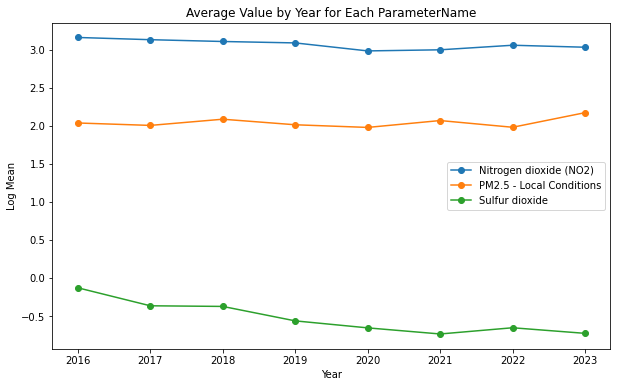

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
grouped = air_data.groupby(['Parameter Name', 'Year'])['Arithmetic Mean'].mean().reset_index()
grouped['log mean']=np.log(grouped['Arithmetic Mean'])
plt.figure(figsize=(10, 6))

for name, group in grouped.groupby('Parameter Name'):
    
    plt.plot(group['Year'], group['log mean'], marker='o', linestyle='-', label=name)
plt.legend()
plt.title('Average Value by Year for Each ParameterName')
plt.xlabel('Year')
plt.ylabel('Log Mean')

plt.show()

In [20]:
import pandas as pd


pivot_df = grouped.pivot(index='Parameter Name', columns='Year', values='Arithmetic Mean')

# Reset the index if you want 'Parameter Name' back as a column
pivot_df = pivot_df.reset_index()

# Now 'pivot_df' is structured with 'Parameter Name' as rows and each 'Year' as a separate column
pivot_df


Year,Parameter Name,2016,2017,2018,2019,2020,2021,2022,2023
0,Nitrogen dioxide (NO2),23.569506,22.890263,22.354367,21.940225,19.752054,20.041516,21.280915,20.730658
1,PM2.5 - Local Conditions,7.660326,7.420426,8.049644,7.482395,7.226096,7.909343,7.241418,8.773610
2,Sulfur dioxide,0.878199,0.693297,0.687531,0.568616,0.518669,0.478675,0.519409,0.482607


In [21]:
yearly_counts

Year
2010      3
2011     33
2012     10
2013      7
2014     29
2015     87
2016    129
2017    133
2018    166
2019    303
2020    486
2021    836
2022    839
2023    659
2024     72
Name: count, dtype: int64

In [22]:
import pandas as pd

all_data = pd.merge(grouped, yearly_counts, on='Year')


print(all_data)


              Parameter Name  Year  Arithmetic Mean  log mean  count
0     Nitrogen dioxide (NO2)  2016        23.569506  3.159954    129
1   PM2.5 - Local Conditions  2016         7.660326  2.036054    129
2             Sulfur dioxide  2016         0.878199 -0.129882    129
3     Nitrogen dioxide (NO2)  2017        22.890263  3.130712    133
4   PM2.5 - Local Conditions  2017         7.420426  2.004236    133
5             Sulfur dioxide  2017         0.693297 -0.366297    133
6     Nitrogen dioxide (NO2)  2018        22.354367  3.107022    166
7   PM2.5 - Local Conditions  2018         8.049644  2.085628    166
8             Sulfur dioxide  2018         0.687531 -0.374648    166
9     Nitrogen dioxide (NO2)  2019        21.940225  3.088322    303
10  PM2.5 - Local Conditions  2019         7.482395  2.012553    303
11            Sulfur dioxide  2019         0.568616 -0.564550    303
12    Nitrogen dioxide (NO2)  2020        19.752054  2.983257    486
13  PM2.5 - Local Conditions  2020

In [23]:
pivot_df = all_data.groupby(['Parameter Name', 'Year']).agg({'Arithmetic Mean': 'mean', 'count':'mean'}).reset_index()

# Reset the index if you want 'Parameter Name' back as a column
pivot_df = all_data.pivot_table(
    index='Parameter Name', 
    columns='Year', 
    values=['Arithmetic Mean', 'count'],
).reset_index()

# Now 'pivot_df' is structured with 'Parameter Name' as rows and each 'Year' as a separate column
pivot_df


Parameter Name Arithmetic Mean                        \
Year                                      2016       2017       2018   
0       Nitrogen dioxide (NO2)       23.569506  22.890263  22.354367   
1     PM2.5 - Local Conditions        7.660326   7.420426   8.049644   
2               Sulfur dioxide        0.878199   0.693297   0.687531   

                                                            count            \
Year       2019       2020       2021       2022       2023  2016 2017 2018   
0     21.940225  19.752054  20.041516  21.280915  20.730658   129  133  166   
1      7.482395   7.226096   7.909343   7.241418   8.773610   129  133  166   
2      0.568616   0.518669   0.478675   0.519409   0.482607   129  133  166   

                               
Year 2019 2020 2021 2022 2023  
0     303  486  836  839  659  
1     303  486  836  839  659  
2     303  486  836  839  659

HEAT MAP

In [24]:
data_type2 = data['TYPE OF CHARGER'] == 'Level 2 Charger'

In [25]:
data_type2 = data[data['TYPE OF CHARGER'] == 'Level 2 Charger']

In [26]:
import folium

# Drop rows with NaN values in latitude and longitude columns
filtered_data = data_type2.dropna(subset=['LATITUDE', 'LONGITUDE'])

# Create a map centered around New York City
nyc_map = folium.Map(location=[40.7128, -74.0060], zoom_start=10)

# Add markers for each charging station
for index, row in filtered_data.iterrows():
    folium.Marker(
        location=[row['LATITUDE'], row['LONGITUDE']],
        popup=row['ADDRESS']
    ).add_to(nyc_map)

# Save the map to an HTML file
nyc_map.save("charging_stations_map.html")


In [27]:
import folium
from folium.plugins import HeatMap

# Aggregate data by postcode
postcode_data = filtered_data.groupby('POSTCODE').agg({
    'LATITUDE': 'mean',
    'LONGITUDE': 'mean',
    'STATION NAME': 'count'
}).reset_index()

postcode_data.rename(columns={'STATION NAME': 'count'})
# Create a map centered around New York City
nyc_map = folium.Map(location=[40.7128, -74.0060], zoom_start=10)

# Convert data to list of [latitude, longitude, weight]
heat_data = [[row['LATITUDE'], row['LONGITUDE'], row['STATION NAME']] for index, row in postcode_data.iterrows()]

# Add heatmap layer
HeatMap(heat_data).add_to(nyc_map)

# Save the map to an HTML file
nyc_map.save("charging_stations_heatmap.html")


In [28]:
from folium.plugins import HeatMap, MarkerCluster

In [29]:
map = folium.Map(location=[40.7128, -74.0060], zoom_start=11)
gradient = {0.2: 'blue', 0.4: 'purple', 0.6: 'orange', 0.8: 'red'}

In [30]:
heat_data = [[row['LATITUDE'], row['LONGITUDE'], row['STATION NAME']] for index, row in postcode_data.iterrows()]
HeatMap(heat_data, gradient=gradient, radius=15, max_zoom=13).add_to(map)

In [31]:
marker_cluster = MarkerCluster().add_to(map)
for _, row in postcode_data.iterrows():
    folium.Marker(
        location=[row['LATITUDE'], row['LONGITUDE']],
        popup=f"ZIP Code: {row['POSTCODE']}<br>Stations: {row['STATION NAME']}",
        icon=None
    ).add_to(marker_cluster)

In [32]:

map.save('nyc_ev_charging_heatmap_enhanced.html')
map

In [33]:
grouped_AQ_data = air_data.groupby(['Parameter Name', 'Latitude', 'Longitude']).agg({
    'Arithmetic Mean': 'mean'
}).reset_index()

pollutants = grouped_AQ_data['Parameter Name'].unique()

for pollutant in pollutants:
    map = folium.Map(location=[40.7128, -74.0060], zoom_start=11)
    pollutant_data = grouped_AQ_data[grouped_AQ_data['Parameter Name'] == pollutant]
    heat_data = [[row['Latitude'], row['Longitude'], row['Arithmetic Mean']] for index, row in pollutant_data.iterrows()]
    HeatMap(heat_data).add_to(map)
    map.save(f'nyc_air_quality_{pollutant}.html')

In [34]:
filtered_data

,STATION NAME,AGENCY,NO. OF PLUGS,TYPE OF CHARGER,ADDRESS,CITY,POSTCODE,BOROUGH,LATITUDE,LONGITUDE,COMMUNITY DISTRICT,COUNCIL DISTRICT,CENSUS TRACT 2020,BIN,BBL,NEIGHBORHOOD TABULATION AREA (NTA) (2020)
2,NYC FLEET / ACS_LINDEN-1,ACS,1,Level 2 Charger,2554 Linden Blvd,Brooklyn,11208.0,Brooklyn,40.668034,-73.869949,305.0,42.0,1220.0,3098733.0,3.044840e+09,BK0505
3,NYC FLEET / ACSSTMARKSPL1,ACS,1,Level 2 Charger,350 St Marks Pl,Staten Island,10301.0,Staten Island,40.640708,-74.077697,501.0,49.0,3.0,5000185.0,5.000160e+09,SI0101
4,NYC FLEET / CITYHALL EAST,CITYHALL,2,Level 2 Charger,New York City Hall,New York,10007.0,Manhattan,40.712806,-74.006096,101.0,1.0,31.0,1079147.0,1.001220e+09,MN0102
5,NYC FLEET / CITYHALL WEST,CITYHALL,2,Level 2 Charger,New York City Hall,New York,10007.0,Manhattan,40.712806,-74.006096,101.0,1.0,31.0,1079147.0,1.001220e+09,MN0102
10,NYC FLEET / DCAS_KENTAVE1,DCAS,1,Level 2 Charger,390 Kent Ave,Brooklyn,11249.0,Brooklyn,40.711246,-73.968348,301.0,33.0,549.0,3063635.0,3.024670e+09,BK0102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1224,DSNY_ENPHASE_CRSBBMS4-2,DSNY,1,Level 2 Charger,52-35 58th Street,Woodside,11377.0,Queens,40.734883,-73.909957,402.0,26.0,243.0,4462505.0,4.023610e+09,QN0203
1225,DSNY_ENPHASE_CRSBBMS4-3,DSNY,1,Level 2 Charger,52-35 58th Street,Woodside,11377.0,Queens,40.734883,-73.909957,402.0,26.0,243.0,4462505.0,4.023610e+09,QN0203
1226,DSNY_ENPHASE_CRSBBMS4-4,DSNY,1,Level 2 Charger,52-35 58th Street,Woodside,11377.0,Queens,40.734883,-73.909957,402.0,26.0,243.0,4462505.0,4.023610e+09,QN0203
1227,DSNY_ENPHASE_CRSBBMS4-5,DSNY,1,Level 2 Charger,52-35 58th Street,Woodside,11377.0,Queens,40.734883,-73.909957,402.0,26.0,243.0,4462505.0,4.023610e+09,QN0203


In [35]:
data_kaggle = pd.read_csv('air-quality.csv')

In [36]:
data_kaggle['geo_entity_id'].unique()
data_kaggle

,indicator_data_id,indicator_id,name,Measure,geo_type_name,geo_entity_id,geo_entity_name,year_description,data_valuemessage
0,130728,646,Air Toxics Concentrations- Average Benzene Con...,Average Concentration,Borough,1,Bronx,2005,2.8
1,130729,646,Air Toxics Concentrations- Average Benzene Con...,Average Concentration,Borough,2,Brooklyn,2005,2.8
2,130730,646,Air Toxics Concentrations- Average Benzene Con...,Average Concentration,Borough,3,Manhattan,2005,4.7
3,130731,646,Air Toxics Concentrations- Average Benzene Con...,Average Concentration,Borough,4,Queens,2005,1.9
4,130732,646,Air Toxics Concentrations- Average Benzene Con...,Average Concentration,Borough,5,Staten Island,2005,1.6
...,...,...,...,...,...,...,...,...,...
2764,151756,645,Traffic Density- Annual Vehicle Miles Traveled...,Per 100 km2,UHF42,410,Rockaways,2005,0.2
2765,151757,645,Traffic Density- Annual Vehicle Miles Traveled...,Per 100 km2,UHF42,501,Port Richmond,2005,0.3
2766,151758,645,Traffic Density- Annual Vehicle Miles Traveled...,Per 100 km2,UHF42,502,Stapleton - St. George,2005,0.8
2767,151759,645,Traffic Density- Annual Vehicle Miles Traveled...,Per 100 km2,UHF42,503,Willowbrook,2005,0.8


In [42]:
nyc = gpd.read_file('https://data.cityofnewyork.us/api/geospatial/d3c5-ddgc?method=export&format=Shapefile')
nyc

,borough,location_i,objectid,shape_area,shape_leng,zone,geometry
0,EWR,1.0,1.0,0.000782,0.116357,Newark Airport,"POLYGON ((-74.18445 40.69500, -74.18449 40.695..."
1,Queens,2.0,2.0,0.004866,0.433470,Jamaica Bay,"MULTIPOLYGON (((-73.82338 40.63899, -73.82277 ..."
2,Bronx,3.0,3.0,0.000314,0.084341,Allerton/Pelham Gardens,"POLYGON ((-73.84793 40.87134, -73.84725 40.870..."
3,Manhattan,4.0,4.0,0.000112,0.043567,Alphabet City,"POLYGON ((-73.97177 40.72582, -73.97179 40.725..."
4,Staten Island,5.0,5.0,0.000498,0.092146,Arden Heights,"POLYGON ((-74.17422 40.56257, -74.17349 40.562..."
...,...,...,...,...,...,...,...
258,Brooklyn,256.0,256.0,0.000169,0.067915,Williamsburg (South Side),"POLYGON ((-73.95834 40.71331, -73.95681 40.712..."
259,Bronx,259.0,259.0,0.000395,0.126750,Woodlawn/Wakefield,"POLYGON ((-73.85107 40.91037, -73.85207 40.909..."
260,Queens,260.0,260.0,0.000422,0.133514,Woodside,"POLYGON ((-73.90175 40.76078, -73.90147 40.759..."
261,Manhattan,261.0,261.0,0.000034,0.027120,World Trade Center,"POLYGON ((-74.01333 40.70503, -74.01327 40.704..."


<Axes: >

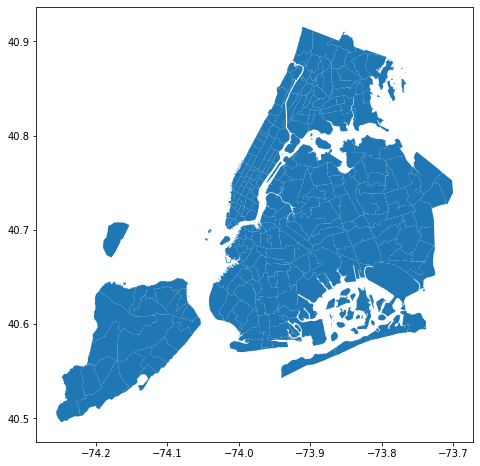

In [43]:
nyc.plot(figsize=(8,8))

In [44]:
ED2019=pd.read_csv('Energy_and_Water_Data_Disclosure_for_Local_Law_84_2020__Data_for_Calendar_Year_2019__20240222.csv')

In [45]:
ED2019.head()

,Property Id,Property Name,Parent Property Id,Parent Property Name,Year Ending,"NYC Borough, Block and Lot (BBL)",NYC Building Identification Number (BIN),Address 1,Address 2,City,...,Last Modified Date - Water Meters,Generation Date,Release Date,Borough,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
0,7365,1155,Not Applicable: Standalone Property,Not Applicable: Standalone Property,12/31/2019,1009970029,1022631,1155 Avenue of the Americas,Not Available,Manhattan,...,Not Available,5/28/2020 4:27,5/28/2020 11:31,MANHATTAN,40.756631,-73.982826,105.0,4.0,119.0,Midtown-Midtown South
1,8139,200,Not Applicable: Standalone Property,Not Applicable: Standalone Property,12/31/2019,1013150001,1037545,200 East 42nd St.,Not Available,Manhattan,...,03/03/2020 05:46 PM EST,5/28/2020 4:27,5/28/2020 11:31,MANHATTAN,40.750698,-73.974306,106.0,4.0,88.0,Turtle Bay-East Midtown
2,8604,114,Not Applicable: Standalone Property,Not Applicable: Standalone Property,12/31/2019,1009990019,1022667,114 West 47th st,Not Available,Manhattan,...,Not Available,5/28/2020 4:27,5/28/2020 11:31,MANHATTAN,40.758310,-73.982504,105.0,4.0,125.0,Midtown-Midtown South
3,8841,733,Not Applicable: Standalone Property,Not Applicable: Standalone Property,12/31/2019,1013190047,1037596,733 Third Avenue,Not Available,Manhattan,...,Not Available,5/28/2020 4:27,5/28/2020 11:31,MANHATTAN,40.753074,-73.972753,106.0,4.0,90.0,Turtle Bay-East Midtown
4,11809,Conde Nast Building,Not Applicable: Standalone Property,Not Applicable: Standalone Property,12/31/2019,1009950005,1085682,4 Times Square,Not Available,Manhattan,...,Not Available,5/28/2020 4:27,5/28/2020 11:31,MANHATTAN,40.756181,-73.986244,105.0,4.0,119.0,Midtown-Midtown South


In [46]:
print(ED2019.columns)

Index(['Property Id', 'Property Name', 'Parent Property Id',
       'Parent Property Name', 'Year Ending',
       'NYC Borough, Block and Lot (BBL)',
       'NYC Building Identification Number (BIN)', 'Address 1', 'Address 2',
       'City',
       ...
       'Last Modified Date - Water Meters', 'Generation Date', 'Release Date',
       'Borough', 'Latitude', 'Longitude', 'Community Board',
       'Council District', 'Census Tract', 'NTA'],
      dtype='object', length=254)


In [47]:
ED2022=pd.read_csv('NYC_Building_Energy_and_Water_Data_Disclosure_for_Local_Law_84__2023-Present__20240222.csv')

In [48]:
ED2015=pd.read_csv('Energy_and_Water_Data_Disclosure_for_Local_Law_84_2016__Data_for_Calendar_Year_2015__20240222.csv')

In [49]:
columns_to_keep = ['Property Id', 
                   'City',  
                   'Postcode', 
                   'Year Built', 
                   'ENERGY STAR Score', 
                   'Site EUI (kBtu/sqft)', 
                   'Green Power - Onsite (kWh)', 
                   'Green Power - Offsite (kWh)', 
                   'Total GHG Emissions (Metric Tons CO2e)',
                   'Borough',
                   'Latitude',
                   'Longitude']
                   

In [50]:
ED2015=ED2015[columns_to_keep]
ED2015

,Property Id,City,Postcode,Year Built,ENERGY STAR Score,Site EUI (kBtu/sqft),Green Power - Onsite (kWh),Green Power - Offsite (kWh),Total GHG Emissions (Metric Tons CO2e),Borough,Latitude,Longitude
0,2659942,Bronx,10461,1981,Not Available,Not Available,Not Available,Not Available,Not Available,BRONX,40.837532,-73.842448
1,3287077,Staten Island,10303,1912,Not Available,7.7,Not Available,0,34,STATEN IS,40.637405,-74.160722
2,2685891,NEW YORK,10022,1925,17,108,Not Available,0,1943.3,MANHATTAN,40.759432,-73.975415
3,2664118,New York,10022,1972,9,125.4,Not Available,0,7441.2,MANHATTAN,40.758684,-73.961705
4,2674133,Queens,11694,1968,Not Available,96.5,Not Available,0,2477.9,QUEENS,40.585783,-73.820357
...,...,...,...,...,...,...,...,...,...,...,...,...
16134,5049367,Brooklyn,11203,1954,Not Available,5,Not Available,0,66,BROOKLYN,40.642627,-73.922881
16135,5053013,Bronx,10456,1972,Not Available,305.9,Not Available,0,3888.7,BRONX,40.831568,-73.912013
16136,5053133,Manhattan,10040,1932,69,73.7,Not Available,0,292.7,MANHATTAN,40.856172,-73.934035
16137,5053337,Bronx,10458,1923,100,26.6,Not Available,0,134.5,BRONX,40.868369,-73.892614


In [51]:
ED2019=ED2019[columns_to_keep]
ED2019

,Property Id,City,Postcode,Year Built,ENERGY STAR Score,Site EUI (kBtu/sqft),Green Power - Onsite (kWh),Green Power - Offsite (kWh),Total GHG Emissions (Metric Tons CO2e),Borough,Latitude,Longitude
0,7365,Manhattan,10036,1982,80,50.1,Not Available,0,2747.2,MANHATTAN,40.756631,-73.982826
1,8139,Manhattan,10017,1956,68,95.2,Not Available,0,2752.2,MANHATTAN,40.750698,-73.974306
2,8604,Manhattan,10036,1989,72,67.4,Not Available,0,3038.1,MANHATTAN,40.758310,-73.982504
3,8841,Manhattan,10017,1961,63,99.4,Not Available,0,2913.5,MANHATTAN,40.753074,-73.972753
4,11809,Manhattan,10036,1999,46,100.2,Not Available,0,12186.2,MANHATTAN,40.756181,-73.986244
...,...,...,...,...,...,...,...,...,...,...,...,...
29079,14308553,Queens,11102,1917,29,118.9,Not Available,0,247.8,QUEENS,40.765550,-73.921363
29080,14315113,Queens,11372,1930,73,84.3,Not Available,0,197.6,QUEENS,40.753750,-73.884789
29081,14359386,Bronx,10457,1900,Not Available,23.2,Not Available,0,56.6,BRONX,40.851469,-73.897177
29082,14365370,Bronx,10467,1950,Not Available,Not Available,Not Available,Not Available,0,BRONX,40.860053,-73.864610


In [52]:
ED2022=ED2022[columns_to_keep]
ED2022.head()

,Property Id,City,Postcode,Year Built,ENERGY STAR Score,Site EUI (kBtu/sqft),Green Power - Onsite (kWh),Green Power - Offsite (kWh),Total GHG Emissions (Metric Tons CO2e),Borough,Latitude,Longitude
0,6414946,Queens,11378,1930,96,10.1,Not Available,0,29.9,QUEENS,40.719667,-73.911197
1,9793770,Bronx,10461,1960,61,58.5,Not Available,0,216.1,BRONX,40.855488,-73.830726
2,10177418,Far Rockaway,11691,1941,Not Available,63.8,Not Available,0,163.1,QUEENS,40.604320,-73.753009
3,13511507,New York,10029,1898,64,68.2,Not Available,0,457.3,MANHATTAN,40.786963,-73.947537
4,14009907,Queens,11105,1911,98,51.1,Not Available,0,320.9,QUEENS,40.773768,-73.913573


In [53]:
ED2022['ENERGY STAR Score'].unique()

array(['96', '61', 'Not Available', '64', '98', '83', '58', '16', '71',
       '37', '32', '40', '51', '18', '36', '46', '44', '27', '53', '47',
       '87', '92', '48', '25', '29', '33', '23', '81', '80', '7', '12',
       '63', '1', '34', '76', '45', '60', '14', '52', '100', '99', '6',
       '97', '90', '88', '93', '94', '72', '86', '73', '38', '10', '69',
       '74', '20', '82', '56', '15', '17', '9', '85', '5', '28', '30',
       '75', '22', '43', '55', '65', '89', '84', '91', '13', '3', '4',
       '78', '79', '24', '19', '62', '31', '68', '50', '70', '2', '35',
       '11', '41', '57', '59', '95', '49', '42', '66', '77', '8', '26',
       '39', '54', '21', '67'], dtype=object)

In [54]:
import seaborn as sns
import contextily as ctx

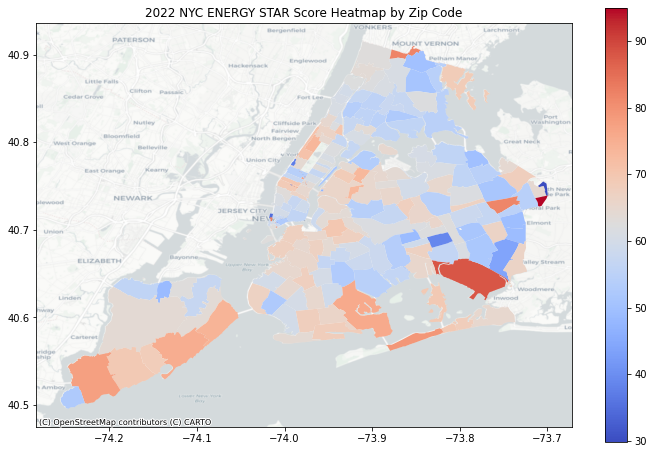

In [60]:
nyc_zipcode_map = gpd.read_file('zip_code.geojson')


ED2022_ESS = ED2022[ED2022['ENERGY STAR Score'] != 'Not Available']
ED2022_ESS['ENERGY STAR Score'] = pd.to_numeric(ED2022_ESS['ENERGY STAR Score'])
postcode_avg = ED2022_ESS.groupby('Postcode').agg({'ENERGY STAR Score': 'mean'}).reset_index()

merged_data = nyc_zipcode_map.merge(postcode_avg, left_on='ZIPCODE', right_on='Postcode')

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
merged_data.plot(column='ENERGY STAR Score', ax=ax, legend=True, cmap='coolwarm')
ctx.add_basemap(ax, crs=merged_data.crs.to_string(), source=ctx.providers.CartoDB.Positron)
ax.set_title('2022 NYC ENERGY STAR Score Heatmap by Zip Code')
plt.show()

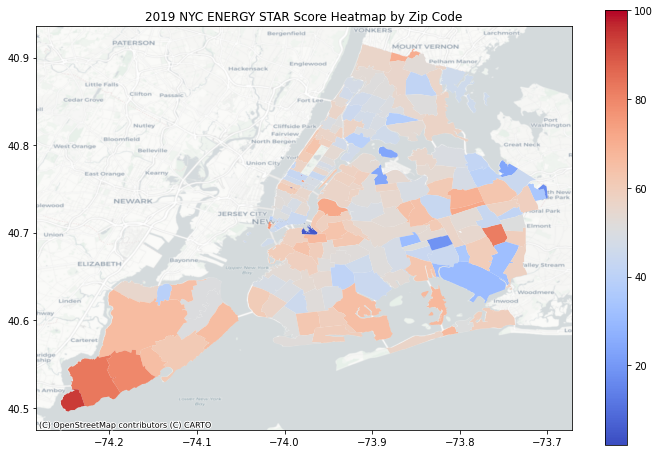

In [61]:
ED2019_ESS = ED2019[ED2019['ENERGY STAR Score'] != 'Not Available']
ED2019_ESS['ENERGY STAR Score'] = pd.to_numeric(ED2019_ESS['ENERGY STAR Score'])
postcode_avg = ED2019_ESS.groupby('Postcode').agg({'ENERGY STAR Score': 'mean'}).reset_index()


merged_data = nyc_zipcode_map.merge(postcode_avg, left_on='ZIPCODE', right_on='Postcode')


fig, ax = plt.subplots(1, 1, figsize=(12, 8))
merged_data.plot(column='ENERGY STAR Score', ax=ax, legend=True, cmap='coolwarm')
ctx.add_basemap(ax, crs=merged_data.crs.to_string(), source=ctx.providers.CartoDB.Positron)
ax.set_title('2019 NYC ENERGY STAR Score Heatmap by Zip Code')
plt.show()

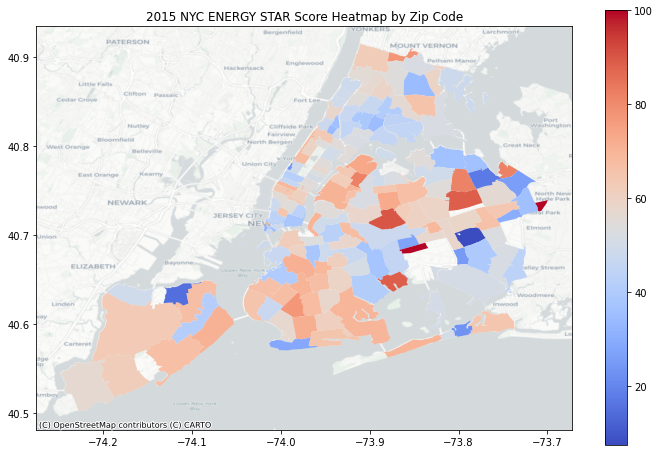

In [62]:
ED2015_ESS = ED2015[ED2015['ENERGY STAR Score'] != 'Not Available']
ED2015_ESS['ENERGY STAR Score'] = pd.to_numeric(ED2015_ESS['ENERGY STAR Score'])
postcode_avg = ED2015_ESS.groupby('Postcode').agg({'ENERGY STAR Score': 'mean'}).reset_index()

merged_data = nyc_zipcode_map.merge(postcode_avg, left_on='ZIPCODE', right_on='Postcode')


fig, ax = plt.subplots(1, 1, figsize=(12, 8))
merged_data.plot(column='ENERGY STAR Score', ax=ax, legend=True, cmap='coolwarm')
ctx.add_basemap(ax, crs=merged_data.crs.to_string(), source=ctx.providers.CartoDB.Positron)
ax.set_title('2015 NYC ENERGY STAR Score Heatmap by Zip Code')
plt.show()

In [63]:
print("Descriptive Statistics for 2015:\n", ED2015_ESS['ENERGY STAR Score'].describe())
print("\nDescriptive Statistics for 2019:\n", ED2019_ESS['ENERGY STAR Score'].describe())
print("\nDescriptive Statistics for 2022:\n", ED2022_ESS['ENERGY STAR Score'].describe())

Descriptive Statistics for 2015:
 count    12599.000000
mean        58.388523
std         30.227532
min          1.000000
25%         34.000000
50%         64.000000
75%         84.000000
max        100.000000
Name: ENERGY STAR Score, dtype: float64

Descriptive Statistics for 2019:
 count    23781.000000
mean        54.676464
std         29.480301
min          1.000000
25%         31.000000
50%         57.000000
75%         79.000000
max        100.000000
Name: ENERGY STAR Score, dtype: float64

Descriptive Statistics for 2022:
 count    23880.000000
mean        61.909883
std         28.736363
min          1.000000
25%         41.000000
50%         67.000000
75%         86.000000
max        100.000000
Name: ENERGY STAR Score, dtype: float64


In [66]:
print("Normality Test for 2015:\n", shapiro(ED2015_ESS['ENERGY STAR Score'].dropna()))
print("Normality Test for 2019:\n", shapiro(ED2019_ESS['ENERGY STAR Score'].dropna()))
print("Normality Test for 2022:\n", shapiro(ED2022_ESS['ENERGY STAR Score'].dropna()))

Normality Test for 2015:
 ShapiroResult(statistic=0.9342659711837769, pvalue=0.0)
Normality Test for 2019:
 ShapiroResult(statistic=0.9541198015213013, pvalue=0.0)
Normality Test for 2022:
 ShapiroResult(statistic=0.9375321269035339, pvalue=0.0)


# EUI VIS

In [77]:
import matplotlib.colors as mcolors

In [78]:
ED2022_EUI = ED2022[ED2022['Site EUI (kBtu/sqft)'] != 'Not Available']
ED2022_EUI['Site EUI (kBtu/sqft)'] = pd.to_numeric(ED2022_EUI['Site EUI (kBtu/sqft)'])

In [79]:
ED2019_EUI = ED2019[ED2019['Site EUI (kBtu/sqft)'] != 'Not Available']
ED2019_EUI['Site EUI (kBtu/sqft)'] = pd.to_numeric(ED2019_EUI['Site EUI (kBtu/sqft)'])

In [80]:
ED2015_EUI = ED2015[ED2015['Site EUI (kBtu/sqft)'] != 'Not Available']
ED2015_EUI['Site EUI (kBtu/sqft)'] = pd.to_numeric(ED2015_EUI['Site EUI (kBtu/sqft)'])

In [81]:
mean_eui = ED2019_EUI['Site EUI (kBtu/sqft)'].mean()
std_eui = ED2019_EUI['Site EUI (kBtu/sqft)'].std()

threshold = 2.3

# Filter out outliers
ED2019_EUI = ED2019_EUI[(ED2019_EUI['Site EUI (kBtu/sqft)'] > mean_eui - threshold * std_eui) & 
                                 (ED2019_EUI['Site EUI (kBtu/sqft)'] < mean_eui + threshold * std_eui)]

In [82]:
mean_eui = ED2022_EUI['Site EUI (kBtu/sqft)'].mean()
std_eui = ED2022_EUI['Site EUI (kBtu/sqft)'].std()

threshold = 2.3

# Filter out outliers
ED2022_EUI = ED2022_EUI[(ED2022_EUI['Site EUI (kBtu/sqft)'] > mean_eui - threshold * std_eui) & 
                                 (ED2022_EUI['Site EUI (kBtu/sqft)'] < mean_eui + threshold * std_eui)]

In [83]:
mean_eui = ED2015_EUI['Site EUI (kBtu/sqft)'].mean()
std_eui = ED2015_EUI['Site EUI (kBtu/sqft)'].std()

threshold = 2.3

# Filter out outliers
ED2015_EUI = ED2015_EUI[(ED2015_EUI['Site EUI (kBtu/sqft)'] > mean_eui - threshold * std_eui) & 
                                 (ED2015_EUI['Site EUI (kBtu/sqft)'] < mean_eui + threshold * std_eui)]

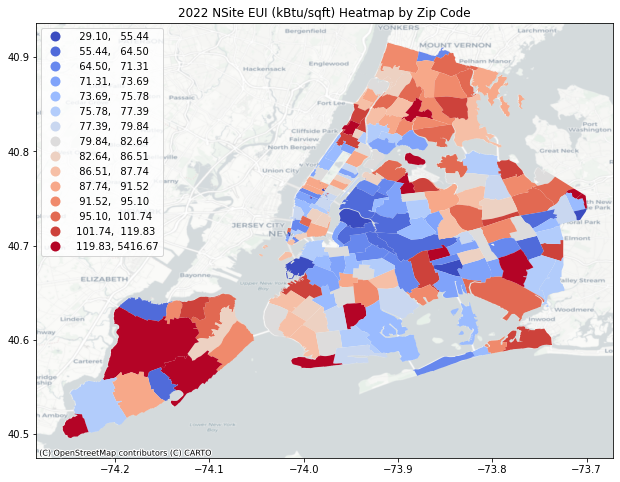

In [84]:
postcode_avg = ED2022_EUI.groupby('Postcode').agg({'Site EUI (kBtu/sqft)': 'mean'}).reset_index()

merged_data = nyc_zipcode_map.merge(postcode_avg, left_on='ZIPCODE', right_on='Postcode')

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
merged_data.plot(column='Site EUI (kBtu/sqft)', ax=ax, legend=True, cmap='coolwarm',scheme='quantiles',k = 15, legend_kwds={'loc': 'upper left'})
ctx.add_basemap(ax, crs=merged_data.crs.to_string(), source=ctx.providers.CartoDB.Positron)
ax.set_title('2022 NSite EUI (kBtu/sqft) Heatmap by Zip Code')
plt.show()

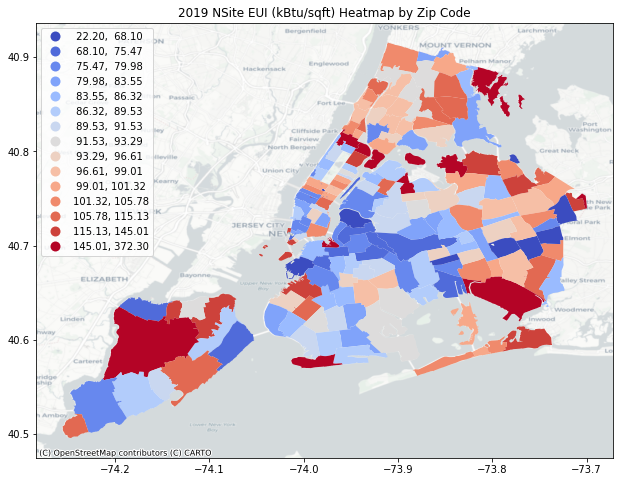

In [85]:
postcode_avg = ED2019_EUI.groupby('Postcode').agg({'Site EUI (kBtu/sqft)': 'mean'}).reset_index()

merged_data = nyc_zipcode_map.merge(postcode_avg, left_on='ZIPCODE', right_on='Postcode')

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
merged_data.plot(column='Site EUI (kBtu/sqft)', ax=ax, legend=True, cmap='coolwarm',scheme='quantiles',k = 15, legend_kwds={'loc': 'upper left'})
ctx.add_basemap(ax, crs=merged_data.crs.to_string(), source=ctx.providers.CartoDB.Positron)
ax.set_title('2019 NSite EUI (kBtu/sqft) Heatmap by Zip Code')
plt.show()

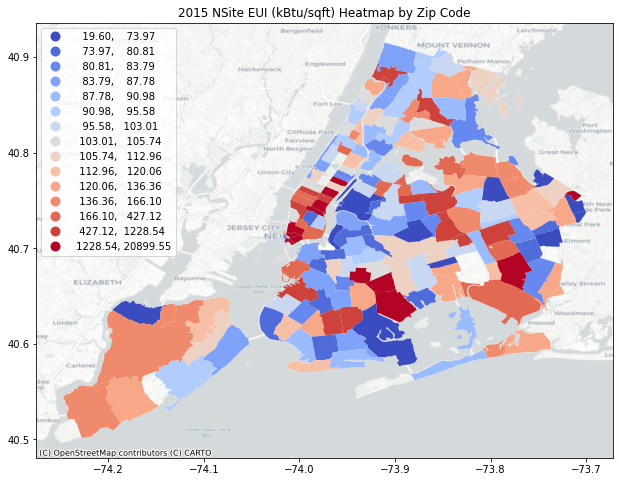

In [86]:
postcode_avg = ED2015_EUI.groupby('Postcode').agg({'Site EUI (kBtu/sqft)': 'mean'}).reset_index()

merged_data = nyc_zipcode_map.merge(postcode_avg, left_on='ZIPCODE', right_on='Postcode')

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
merged_data.plot(column='Site EUI (kBtu/sqft)', ax=ax, legend=True, cmap='coolwarm',scheme='quantiles',k = 15, legend_kwds={'loc': 'upper left'})
ctx.add_basemap(ax, crs=merged_data.crs.to_string(), source=ctx.providers.CartoDB.Positron)
ax.set_title('2015 NSite EUI (kBtu/sqft) Heatmap by Zip Code')
plt.show()

In [87]:
print("Descriptive Statistics for 2015:\n", ED2015_EUI['Site EUI (kBtu/sqft)'].describe())
print("\nDescriptive Statistics for 2019:\n", ED2019_EUI['Site EUI (kBtu/sqft)'].describe())
print("\nDescriptive Statistics for 2022:\n", ED2022_EUI['Site EUI (kBtu/sqft)'].describe())

Descriptive Statistics for 2015:
 count     15896.000000
mean        376.954825
std        5163.521129
min          -5.800000
25%          64.300000
50%          82.450000
75%         105.500000
max      292871.300000
Name: Site EUI (kBtu/sqft), dtype: float64

Descriptive Statistics for 2019:
 count    28289.000000
mean        93.075436
std        197.222130
min          0.000000
25%         62.000000
50%         82.900000
75%        105.300000
max      22222.400000
Name: Site EUI (kBtu/sqft), dtype: float64

Descriptive Statistics for 2022:
 count     28885.000000
mean        116.040685
std        1906.960500
min          -0.400000
25%          54.800000
50%          76.000000
75%          97.000000
max      192600.000000
Name: Site EUI (kBtu/sqft), dtype: float64


In [88]:
from scipy.stats import shapiro

print("Normality Test for 2015:\n", shapiro(ED2015_EUI['Site EUI (kBtu/sqft)']))
print("Normality Test for 2019:\n", shapiro(ED2019_EUI['Site EUI (kBtu/sqft)']))
print("Normality Test for 2022:\n", shapiro(ED2022_EUI['Site EUI (kBtu/sqft)']))


Normality Test for 2015:
 ShapiroResult(statistic=0.033129334449768066, pvalue=0.0)
Normality Test for 2019:
 ShapiroResult(statistic=0.10057443380355835, pvalue=0.0)
Normality Test for 2022:
 ShapiroResult(statistic=0.008342921733856201, pvalue=0.0)


# GHG emission

In [94]:

ED2019_GHG['Total GHG Emissions (Metric Tons CO2e)'] = pd.to_numeric(ED2019_GHG['Total GHG Emissions (Metric Tons CO2e)'], errors='coerce')
ED2022_GHG['Total GHG Emissions (Metric Tons CO2e)'] = pd.to_numeric(ED2022_GHG['Total GHG Emissions (Metric Tons CO2e)'], errors='coerce')
ED2015_GHG['Total GHG Emissions (Metric Tons CO2e)'] = pd.to_numeric(ED2015_GHG['Total GHG Emissions (Metric Tons CO2e)'], errors='coerce')

mean_GHG_19 = ED2019_GHG['Total GHG Emissions (Metric Tons CO2e)'].mean()
std_GHG_19 = ED2019_GHG['Total GHG Emissions (Metric Tons CO2e)'].std()

mean_GHG_15 = ED2015_GHG['Total GHG Emissions (Metric Tons CO2e)'].mean()
std_GHG_15 = ED2015_GHG['Total GHG Emissions (Metric Tons CO2e)'].std()

mean_GHG_22 = ED2022_GHG['Total GHG Emissions (Metric Tons CO2e)'].mean()
std_GHG_22 = ED2022_GHG['Total GHG Emissions (Metric Tons CO2e)'].std()

threshold = 2.3


ED2019_GHG = ED2019_GHG[(ED2019_GHG['Total GHG Emissions (Metric Tons CO2e)'] > mean_GHG_19 - threshold * std_GHG_19) & 
                        (ED2019_GHG['Total GHG Emissions (Metric Tons CO2e)'] < mean_GHG_19 + threshold * std_GHG_19)]
ED2022_GHG = ED2022_GHG[(ED2022_GHG['Total GHG Emissions (Metric Tons CO2e)'] > mean_GHG_22 - threshold * std_GHG_22) & 
                        (ED2022_GHG['Total GHG Emissions (Metric Tons CO2e)'] < mean_GHG_22 + threshold * std_GHG_22)]
ED2015_GHG = ED2015_GHG[(ED2015_GHG['Total GHG Emissions (Metric Tons CO2e)'] > mean_GHG_15 - threshold * std_GHG_15) & 
                        (ED2015_GHG['Total GHG Emissions (Metric Tons CO2e)'] < mean_GHG_15 + threshold * std_GHG_15)]


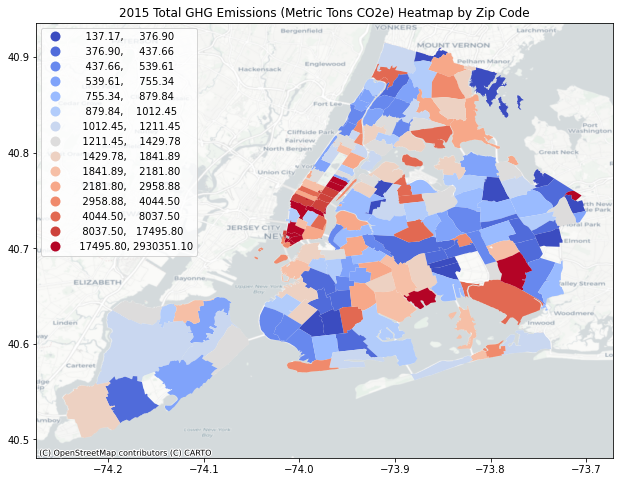

In [95]:
ED2015_GHG = ED2015[ED2015['Total GHG Emissions (Metric Tons CO2e)'] != 'Not Available']
ED2015_GHG['Total GHG Emissions (Metric Tons CO2e)'] = pd.to_numeric(ED2015_GHG['Total GHG Emissions (Metric Tons CO2e)'])

postcode_avg_GHG = ED2015_GHG.groupby('Postcode').agg({'Total GHG Emissions (Metric Tons CO2e)': 'mean'}).reset_index()

merged_data_GHG = nyc_zipcode_map.merge(postcode_avg_GHG, left_on='ZIPCODE', right_on='Postcode')

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
merged_data_GHG.plot(column='Total GHG Emissions (Metric Tons CO2e)', ax=ax, legend=True, cmap='coolwarm', scheme='quantiles', k=15, legend_kwds={'loc': 'upper left'})
ctx.add_basemap(ax, crs=merged_data_GHG.crs.to_string(), source=ctx.providers.CartoDB.Positron)
ax.set_title('2015 Total GHG Emissions (Metric Tons CO2e) Heatmap by Zip Code')
plt.show()

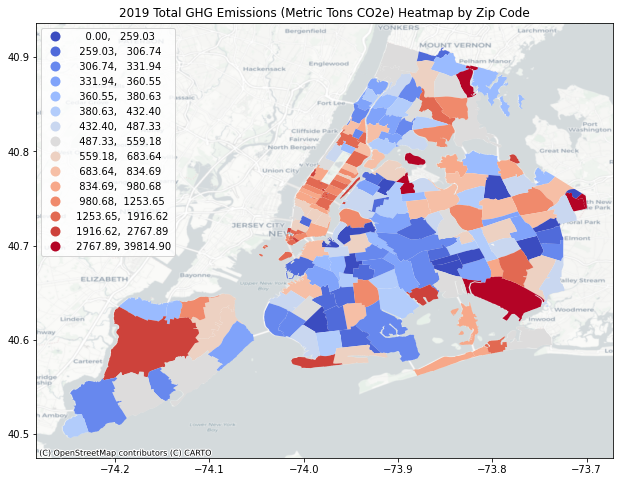

In [98]:
ED2019_GHG = ED2019[ED2019['Total GHG Emissions (Metric Tons CO2e)'] != 'Not Available']
ED2019_GHG['Total GHG Emissions (Metric Tons CO2e)'] = pd.to_numeric(ED2019_GHG['Total GHG Emissions (Metric Tons CO2e)'])

postcode_avg_GHG = ED2019_GHG.groupby('Postcode').agg({'Total GHG Emissions (Metric Tons CO2e)': 'mean'}).reset_index()

merged_data_GHG = nyc_zipcode_map.merge(postcode_avg_GHG, left_on='ZIPCODE', right_on='Postcode')

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
merged_data_GHG.plot(column='Total GHG Emissions (Metric Tons CO2e)', ax=ax, legend=True, cmap='coolwarm', scheme='quantiles', k=15, legend_kwds={'loc': 'upper left'})
ctx.add_basemap(ax, crs=merged_data_GHG.crs.to_string(), source=ctx.providers.CartoDB.Positron)
ax.set_title('2019 Total GHG Emissions (Metric Tons CO2e) Heatmap by Zip Code')
plt.show()

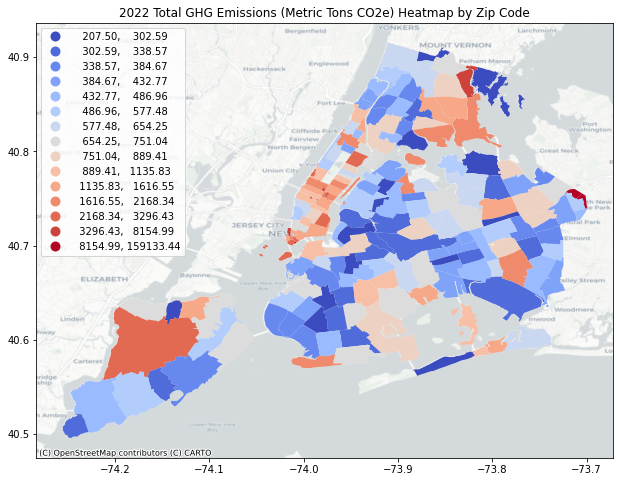

In [99]:
ED2022_GHG = ED2022[ED2022['Total GHG Emissions (Metric Tons CO2e)'] != 'Not Available']
ED2022_GHG['Total GHG Emissions (Metric Tons CO2e)'] = pd.to_numeric(ED2022_GHG['Total GHG Emissions (Metric Tons CO2e)'])

postcode_avg_GHG = ED2022_GHG.groupby('Postcode').agg({'Total GHG Emissions (Metric Tons CO2e)': 'mean'}).reset_index()

merged_data_GHG = nyc_zipcode_map.merge(postcode_avg_GHG, left_on='ZIPCODE', right_on='Postcode')

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
merged_data_GHG.plot(column='Total GHG Emissions (Metric Tons CO2e)', ax=ax, legend=True, cmap='coolwarm', scheme='quantiles', k=15, legend_kwds={'loc': 'upper left'})
ctx.add_basemap(ax, crs=merged_data_GHG.crs.to_string(), source=ctx.providers.CartoDB.Positron)
ax.set_title('2022 Total GHG Emissions (Metric Tons CO2e) Heatmap by Zip Code')
plt.show()

In [235]:
print("Descriptive Statistics for 2015:\n", ED2015_GHG['Total GHG Emissions (Metric Tons CO2e)'].describe())
print("\nDescriptive Statistics for 2019:\n", ED2019_GHG['Total GHG Emissions (Metric Tons CO2e)'].describe())
print("\nDescriptive Statistics for 2022:\n", ED2022_GHG['Total GHG Emissions (Metric Tons CO2e)'].describe())

Descriptive Statistics for 2015:
 count    1.600900e+04
mean     5.846341e+03
std      1.459770e+05
min      0.000000e+00
25%      3.163000e+02
50%      4.984000e+02
75%      9.137000e+02
max      1.501468e+07
Name: Total GHG Emissions (Metric Tons CO2e), dtype: float64

Descriptive Statistics for 2019:
 count     28823.000000
mean        796.049717
std        4897.630891
min           0.000000
25%         193.200000
50%         327.600000
75%         595.650000
max      670083.200000
Name: Total GHG Emissions (Metric Tons CO2e), dtype: float64

Descriptive Statistics for 2022:
 count    3.028200e+04
mean     8.115336e+02
std      1.305456e+04
min     -3.620000e+01
25%      1.595250e+02
50%      2.898500e+02
75%      5.474000e+02
max      2.206863e+06
Name: Total GHG Emissions (Metric Tons CO2e), dtype: float64


Log scale GHG emission distribution plot

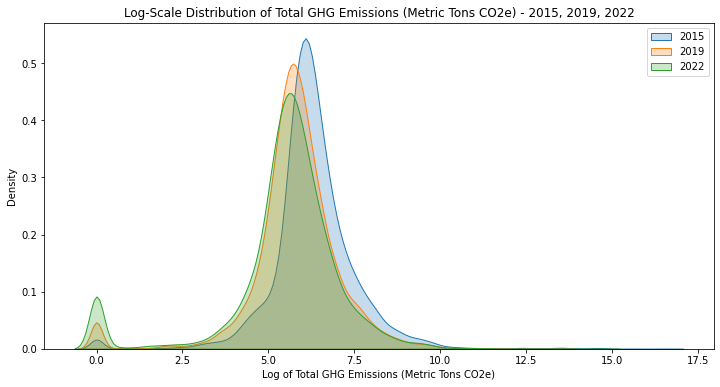

In [254]:

plt.figure(figsize=(12, 6))
sns.kdeplot(np.log1p(ED2015_GHG['Total GHG Emissions (Metric Tons CO2e)']), label='2015', shade=True)
sns.kdeplot(np.log1p(ED2019_GHG['Total GHG Emissions (Metric Tons CO2e)']), label='2019', shade=True)
sns.kdeplot(np.log1p(ED2022_GHG['Total GHG Emissions (Metric Tons CO2e)']), label='2022', shade=True)

plt.title('Log-Scale Distribution of Total GHG Emissions (Metric Tons CO2e) - 2015, 2019, 2022')
plt.xlabel('Log of Total GHG Emissions (Metric Tons CO2e)')
plt.ylabel('Density')
plt.legend()
plt.show()


In [279]:
EV_station_16_23

,Fuel Type Code,Station Name,Street Address,City,State,ZIP,EV Level2 EVSE Num,EV DC Fast Count,Latitude,Longitude,Open Date,Year,Month
0,ELEC,Avon,74 Genesee Street,Avon,NY,14414,2.0,NaN,42.910944,-77.746320,2019-04-01,2019,4
1,ELEC,Dino's Tailor Shop,2400 Monroe Av,Rochester,NY,14618,1.0,NaN,43.118929,-77.556073,2020-01-23,2020,1
2,ELEC,PICOTTE 22 CORPORATE 4,22 Corporate Woods Blvd,Albany,NY,12211,2.0,NaN,42.681427,-73.768380,2020-08-26,2020,8
3,ELEC,Albany Parking Authority - Riverfront Garage,"2 Columbia St,",Albany,NY,12207,5.0,NaN,42.650590,-73.749073,2019-05-02,2019,5
4,ELEC,1065 Elton St,1065 Elton St,Brooklyn,NY,11239,4.0,NaN,40.657441,-73.874619,2021-09-24,2021,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3787,ELEC,Facilities Parking Lot,North Lane,Schenectady,NY,12308,4.0,NaN,42.818224,-73.927289,2019-04-02,2019,4
3788,ELEC,Imperial Parking,332-342 E 34th St,New York,NY,10016,2.0,NaN,40.744011,-73.974116,2020-12-03,2020,12
3789,ELEC,ESF MARSHALL HALL 1,121 Esf Campus Dr E,Syracuse,NY,13210,2.0,NaN,43.034090,-76.136233,2023-10-11,2023,10
3790,ELEC,PEPSICO INC STATION 2,100 E Stevens Ave,Valhalla,NY,10595,2.0,NaN,41.095215,-73.774750,2020-02-27,2020,2


In [445]:
EV_station_16_23['Open Date'].unique()

<DatetimeArray>
['2019-04-01 00:00:00', '2020-01-23 00:00:00', '2020-08-26 00:00:00',
 '2019-05-02 00:00:00', '2021-09-24 00:00:00', '2021-10-07 00:00:00',
 '2022-04-14 00:00:00', '2022-09-24 00:00:00', '2023-06-09 00:00:00',
 '2021-10-08 00:00:00',
 ...
 '2022-03-11 00:00:00', '2017-03-09 00:00:00', '2023-03-10 00:00:00',
 '2022-11-28 00:00:00', '2021-01-12 00:00:00', '2020-12-01 00:00:00',
 '2022-07-05 00:00:00', '2020-02-20 00:00:00', '2021-05-03 00:00:00',
 '2016-03-07 00:00:00']
Length: 1053, dtype: datetime64[ns]

In [446]:
ev_aggregated = EV_station_16_23.groupby(['Year','ZIP']).size().reset_index(name='Number of Stations')
ev_aggregated=ev_aggregated.rename(columns={"ZIP": "Postcode"})

In [447]:
ED2022['Site EUI (kBtu/sqft)']=pd.to_numeric(ED2022['Site EUI (kBtu/sqft)'], errors='coerce')
ED2022['ENERGY STAR Score']=pd.to_numeric(ED2022['ENERGY STAR Score'], errors='coerce')
ED2022['Total GHG Emissions (Metric Tons CO2e)']=pd.to_numeric(ED2022['Total GHG Emissions (Metric Tons CO2e)'], errors='coerce')

In [448]:
# Assuming 'EUI_ESS_data' is your combined EUI and ESS data
ED_aggregated_2022 = ED2022.groupby(['Postcode']).agg({'Site EUI (kBtu/sqft)': 'mean', 'ENERGY STAR Score': 'mean', 'Total GHG Emissions (Metric Tons CO2e)':'mean'}).reset_index()
ED_aggregated_2022

,Postcode,Site EUI (kBtu/sqft),ENERGY STAR Score,Total GHG Emissions (Metric Tons CO2e)
0,1367,113.000000,NaN,21855.900000
1,1368,NaN,NaN,0.000000
2,10001,73.955172,64.828571,414.536207
3,10002,103.950000,52.558824,581.707937
4,10003,92.354762,61.750000,540.551190
...,...,...,...,...
505,5 East 196th St,99.100000,NaN,308.800000
506,5002173,111.000000,94.000000,609.300000
507,55425,42.900000,98.000000,1006.200000
508,94105,37.300000,84.000000,902.500000


In [449]:
# Merging the datasets
merged_data = pd.merge(ev_aggregated, ED_aggregated_2022, on=['Postcode'])
merged_data

,Year,Postcode,Number of Stations,Site EUI (kBtu/sqft),ENERGY STAR Score,Total GHG Emissions (Metric Tons CO2e)
0,2016,10001,1,73.955172,64.828571,414.536207
1,2017,10001,3,73.955172,64.828571,414.536207
2,2018,10001,2,73.955172,64.828571,414.536207
3,2022,10001,2,73.955172,64.828571,414.536207
4,2023,10001,3,73.955172,64.828571,414.536207
...,...,...,...,...,...,...
283,2023,11204,1,101.707692,67.111111,248.192308
284,2023,11210,1,70.053333,52.428571,168.010000
285,2023,11361,1,71.416667,75.400000,507.450000
286,2023,11362,1,38.250000,76.000000,41.800000


In [450]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

ev_density = EV_station_16_23.groupby('ZIP').size().reset_index(name='number')
ev_density=ev_density.rename(columns={"ZIP": "Postcode"})
ev_density.columns

Index(['Postcode', 'number'], dtype='object')

In [451]:
# Ensure the 'Postcode' column is present in both dataframes
print(ev_density.columns)
print(merged_data.columns)

# Select the 'Postcode' and 'ENERGY STAR Score' columns from merged_data
merged_data_subset = merged_data[['Postcode', 'ENERGY STAR Score','Site EUI (kBtu/sqft)','Total GHG Emissions (Metric Tons CO2e)']]

# Merge the dataframes
regression_data_2022 = pd.merge(ev_density, merged_data_subset, on='Postcode')


Index(['Postcode', 'number'], dtype='object')
Index(['Year', 'Postcode', 'Number of Stations', 'Site EUI (kBtu/sqft)',
       'ENERGY STAR Score', 'Total GHG Emissions (Metric Tons CO2e)'],
      dtype='object')


In [452]:
regression_data_2022

,Postcode,number,ENERGY STAR Score,Site EUI (kBtu/sqft),Total GHG Emissions (Metric Tons CO2e)
0,10001,11,64.828571,73.955172,414.536207
1,10001,11,64.828571,73.955172,414.536207
2,10001,11,64.828571,73.955172,414.536207
3,10001,11,64.828571,73.955172,414.536207
4,10001,11,64.828571,73.955172,414.536207
...,...,...,...,...,...
283,11433,6,64.750000,53.676923,237.253846
284,11691,1,55.352941,94.580769,603.000000
285,11692,1,45.333333,94.200000,1611.800000
286,11694,2,84.333333,169.825000,1198.475000


In [453]:
X = regression_data_2022[['number']]
y = regression_data_2022['ENERGY STAR Score']

# Check for any NaN values and handle them
X.fillna(0, inplace=True)
y.fillna(y.mean(), inplace=True)

# Create and train the linear regression model
X_with_const = sm.add_constant(X)

# Create the model
model = sm.OLS(y, X_with_const)

# Fit the model
results = model.fit()

# Get the summary
summary = results.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:      ENERGY STAR Score   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.6186
Date:                Fri, 23 Feb 2024   Prob (F-statistic):              0.432
Time:                        05:02:54   Log-Likelihood:                -1020.0
No. Observations:                 288   AIC:                             2044.
Df Residuals:                     286   BIC:                             2051.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         61.9806      0.806     76.933      0.0

2015 regression

In [454]:
ED2015['Site EUI (kBtu/sqft)']=pd.to_numeric(ED2015['Site EUI (kBtu/sqft)'], errors='coerce')
ED2015['ENERGY STAR Score']=pd.to_numeric(ED2015['ENERGY STAR Score'], errors='coerce')
ED2015['Total GHG Emissions (Metric Tons CO2e)']=pd.to_numeric(ED2015['Total GHG Emissions (Metric Tons CO2e)'], errors='coerce')

In [455]:
ED_aggregated_2015 = ED2015.groupby(['Postcode']).agg({'Site EUI (kBtu/sqft)': 'mean', 'ENERGY STAR Score': 'mean', 'Total GHG Emissions (Metric Tons CO2e)':'mean'}).reset_index()
ED_aggregated_2015

,Postcode,Site EUI (kBtu/sqft),ENERGY STAR Score,Total GHG Emissions (Metric Tons CO2e)
0,3318,95.500000,NaN,341.400000
1,10001,79.696154,68.452055,1174.163388
2,10002,79.640678,59.520000,1225.811864
3,10003,761.140559,54.314815,18023.146853
4,10004,622.682353,59.740741,14935.735294
...,...,...,...,...
499,11691,120.287500,64.937500,1019.737500
500,11692,140.712500,23.375000,3478.962500
501,11693,89.728571,50.666667,1955.214286
502,11694,88.562500,70.166667,1139.325000


In [456]:
merged_data = pd.merge(ev_aggregated, ED_aggregated_2015, on=['Postcode'])
print(ev_density.columns)
print(merged_data.columns)

# Select the 'Postcode' and 'ENERGY STAR Score' columns from merged_data
merged_data_subset = merged_data[['Postcode', 'ENERGY STAR Score','Site EUI (kBtu/sqft)','Total GHG Emissions (Metric Tons CO2e)']]

# Merge the dataframes
regression_data_2015 = pd.merge(ev_density, merged_data_subset, on='Postcode')


Index(['Postcode', 'number'], dtype='object')
Index(['Year', 'Postcode', 'Number of Stations', 'Site EUI (kBtu/sqft)',
       'ENERGY STAR Score', 'Total GHG Emissions (Metric Tons CO2e)'],
      dtype='object')


In [457]:
X = regression_data_2015[['number']]
y = regression_data_2015['ENERGY STAR Score']

# Check for any NaN values and handle them
X.fillna(0, inplace=True)
y.fillna(y.mean(), inplace=True)

# Create and train the linear regression model
X_with_const = sm.add_constant(X)

# Create the model
model = sm.OLS(y, X_with_const)

# Fit the model
results = model.fit()

# Get the summary
summary = results.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:      ENERGY STAR Score   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     5.412
Date:                Fri, 23 Feb 2024   Prob (F-statistic):             0.0207
Time:                        05:03:04   Log-Likelihood:                -1181.5
No. Observations:                 306   AIC:                             2367.
Df Residuals:                     304   BIC:                             2374.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         60.8530      1.067     57.015      0.0

regression for 2019

In [458]:
ED2019['Site EUI (kBtu/sqft)']=pd.to_numeric(ED2019['Site EUI (kBtu/sqft)'], errors='coerce')
ED2019['ENERGY STAR Score']=pd.to_numeric(ED2019['ENERGY STAR Score'], errors='coerce')
ED2019['Total GHG Emissions (Metric Tons CO2e)']=pd.to_numeric(ED2019['Total GHG Emissions (Metric Tons CO2e)'], errors='coerce')

In [459]:
ED_aggregated_2019 = ED2019.groupby(['Postcode']).agg({'Site EUI (kBtu/sqft)': 'mean', 'ENERGY STAR Score': 'mean', 'Total GHG Emissions (Metric Tons CO2e)':'mean'}).reset_index()
ED_aggregated_2019

,Postcode,Site EUI (kBtu/sqft),ENERGY STAR Score,Total GHG Emissions (Metric Tons CO2e)
0,10001,77.666225,68.260163,1293.831788
1,10002,79.778378,63.314286,1117.354054
2,10003,85.326190,51.102041,1161.942636
3,10004,81.600000,57.913043,3741.162500
4,10005,97.084615,41.076923,4144.884615
...,...,...,...,...
546,12465,240.200000,NaN,806.700000
547,1261,172.700000,26.000000,521.000000
548,13014,4.800000,NaN,192.600000
549,14214,66.400000,54.000000,242.100000


In [460]:
merged_data = pd.merge(ev_aggregated, ED_aggregated_2019, on=['Postcode'])
print(ev_density.columns)
print(merged_data.columns)

# Select the 'Postcode' and 'ENERGY STAR Score' columns from merged_data
merged_data_subset = merged_data[['Postcode', 'ENERGY STAR Score','Site EUI (kBtu/sqft)','Total GHG Emissions (Metric Tons CO2e)']]

# Merge the dataframes
regression_data_2019 = pd.merge(ev_density, merged_data_subset, on='Postcode')

Index(['Postcode', 'number'], dtype='object')
Index(['Year', 'Postcode', 'Number of Stations', 'Site EUI (kBtu/sqft)',
       'ENERGY STAR Score', 'Total GHG Emissions (Metric Tons CO2e)'],
      dtype='object')


In [461]:
X = regression_data_2019[['number']]
y = regression_data_2019['ENERGY STAR Score']

# Check for any NaN values and handle them
X.fillna(0, inplace=True)
y.fillna(y.mean(), inplace=True)

# Create and train the linear regression model
X_with_const = sm.add_constant(X)

# Create the model
model = sm.OLS(y, X_with_const)

# Fit the model
results = model.fit()

# Get the summary
summary = results.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:      ENERGY STAR Score   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.4543
Date:                Fri, 23 Feb 2024   Prob (F-statistic):              0.501
Time:                        05:03:05   Log-Likelihood:                -1106.6
No. Observations:                 297   AIC:                             2217.
Df Residuals:                     295   BIC:                             2225.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         57.7716      0.947     61.000      0.0

EUI

In [462]:
X = regression_data_2019[['number']]
y = regression_data_2019['Site EUI (kBtu/sqft)']

# Check for any NaN values and handle them
X.fillna(0, inplace=True)
y.fillna(y.mean(), inplace=True)

# Create and train the linear regression model
X_with_const = sm.add_constant(X)

# Create the model
model = sm.OLS(y, X_with_const)

# Fit the model
results = model.fit()

# Get the summary
summary = results.summary()
print(summary)

                             OLS Regression Results                             
Dep. Variable:     Site EUI (kBtu/sqft)   R-squared:                       0.001
Model:                              OLS   Adj. R-squared:                 -0.002
Method:                   Least Squares   F-statistic:                    0.2912
Date:                  Fri, 23 Feb 2024   Prob (F-statistic):              0.590
Time:                          05:03:06   Log-Likelihood:                -1402.3
No. Observations:                   297   AIC:                             2809.
Df Residuals:                       295   BIC:                             2816.
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         86.2908      2.563

# regression cluster

In [463]:
X = regression_data_2015[['number']]
y = regression_data_2015['Site EUI (kBtu/sqft)']

# Check for any NaN values and handle them
X.fillna(0, inplace=True)
y.fillna(y.mean(), inplace=True)

# Create and train the linear regression model
X_with_const = sm.add_constant(X)

# Create the model
model = sm.OLS(y, X_with_const)

# Fit the model
results = model.fit()

# Get the summary
summary = results.summary()
print(summary)

                             OLS Regression Results                             
Dep. Variable:     Site EUI (kBtu/sqft)   R-squared:                       0.015
Model:                              OLS   Adj. R-squared:                  0.011
Method:                   Least Squares   F-statistic:                     4.477
Date:                  Fri, 23 Feb 2024   Prob (F-statistic):             0.0352
Time:                          05:03:06   Log-Likelihood:                -2804.1
No. Observations:                   306   AIC:                             5612.
Df Residuals:                       304   BIC:                             5620.
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        267.8356    214.430

In [464]:
X = regression_data_2019[['number']]
y = regression_data_2019['Site EUI (kBtu/sqft)']

# Check for any NaN values and handle them
X.fillna(0, inplace=True)
y.fillna(y.mean(), inplace=True)

# Create and train the linear regression model
X_with_const = sm.add_constant(X)

# Create the model
model = sm.OLS(y, X_with_const)

# Fit the model
results = model.fit()

# Get the summary
summary = results.summary()
print(summary)

                             OLS Regression Results                             
Dep. Variable:     Site EUI (kBtu/sqft)   R-squared:                       0.001
Model:                              OLS   Adj. R-squared:                 -0.002
Method:                   Least Squares   F-statistic:                    0.2912
Date:                  Fri, 23 Feb 2024   Prob (F-statistic):              0.590
Time:                          05:03:07   Log-Likelihood:                -1402.3
No. Observations:                   297   AIC:                             2809.
Df Residuals:                       295   BIC:                             2816.
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         86.2908      2.563

In [465]:
X = regression_data_2022[['number']]
y = regression_data_2022['Site EUI (kBtu/sqft)']

# Check for any NaN values and handle them
X.fillna(0, inplace=True)
y.fillna(y.mean(), inplace=True)

# Create and train the linear regression model
X_with_const = sm.add_constant(X)

# Create the model
model = sm.OLS(y, X_with_const)

# Fit the model
results = model.fit()

# Get the summary
summary = results.summary()
print(summary)

                             OLS Regression Results                             
Dep. Variable:     Site EUI (kBtu/sqft)   R-squared:                       0.005
Model:                              OLS   Adj. R-squared:                  0.002
Method:                   Least Squares   F-statistic:                     1.446
Date:                  Fri, 23 Feb 2024   Prob (F-statistic):              0.230
Time:                          05:03:07   Log-Likelihood:                -3546.4
No. Observations:                   288   AIC:                             7097.
Df Residuals:                       286   BIC:                             7104.
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9712.4032   5197.003

ESS

In [466]:
X = regression_data_2015[['number']]
y = regression_data_2015['ENERGY STAR Score']

# Check for any NaN values and handle them
X.fillna(0, inplace=True)
y.fillna(y.mean(), inplace=True)

# Create and train the linear regression model
X_with_const = sm.add_constant(X)

# Create the model
model = sm.OLS(y, X_with_const)

# Fit the model
results = model.fit()

# Get the summary
summary = results.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:      ENERGY STAR Score   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     5.412
Date:                Fri, 23 Feb 2024   Prob (F-statistic):             0.0207
Time:                        05:03:08   Log-Likelihood:                -1181.5
No. Observations:                 306   AIC:                             2367.
Df Residuals:                     304   BIC:                             2374.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         60.8530      1.067     57.015      0.0

In [467]:
X = regression_data_2019[['number']]
y = regression_data_2019['ENERGY STAR Score']

# Check for any NaN values and handle them
X.fillna(0, inplace=True)
y.fillna(y.mean(), inplace=True)

# Create and train the linear regression model
X_with_const = sm.add_constant(X)

# Create the model
model = sm.OLS(y, X_with_const)

# Fit the model
results = model.fit()

# Get the summary
summary = results.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:      ENERGY STAR Score   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.4543
Date:                Fri, 23 Feb 2024   Prob (F-statistic):              0.501
Time:                        05:03:08   Log-Likelihood:                -1106.6
No. Observations:                 297   AIC:                             2217.
Df Residuals:                     295   BIC:                             2225.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         57.7716      0.947     61.000      0.0

In [468]:
X = regression_data_2022[['number']]
y = regression_data_2022['ENERGY STAR Score']

# Check for any NaN values and handle them
X.fillna(0, inplace=True)
y.fillna(y.mean(), inplace=True)

# Create and train the linear regression model
X_with_const = sm.add_constant(X)

# Create the model
model = sm.OLS(y, X_with_const)

# Fit the model
results = model.fit()

# Get the summary
summary = results.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:      ENERGY STAR Score   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.6186
Date:                Fri, 23 Feb 2024   Prob (F-statistic):              0.432
Time:                        05:03:08   Log-Likelihood:                -1020.0
No. Observations:                 288   AIC:                             2044.
Df Residuals:                     286   BIC:                             2051.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         61.9806      0.806     76.933      0.0

GHG

In [469]:
X = regression_data_2015[['number']]
y = regression_data_2015['Total GHG Emissions (Metric Tons CO2e)']

# Check for any NaN values and handle them
X.fillna(0, inplace=True)
y.fillna(y.mean(), inplace=True)

# Create and train the linear regression model
X_with_const = sm.add_constant(X)

# Create the model
model = sm.OLS(y, X_with_const)

# Fit the model
results = model.fit()

# Get the summary
summary = results.summary()
print(summary)

                                      OLS Regression Results                                      
Dep. Variable:     Total GHG Emissions (Metric Tons CO2e)   R-squared:                       0.109
Model:                                                OLS   Adj. R-squared:                  0.107
Method:                                     Least Squares   F-statistic:                     37.36
Date:                                    Fri, 23 Feb 2024   Prob (F-statistic):           3.01e-09
Time:                                            05:03:44   Log-Likelihood:                -3224.1
No. Observations:                                     306   AIC:                             6452.
Df Residuals:                                         304   BIC:                             6460.
Df Model:                                               1                                         
Covariance Type:                                nonrobust                                         
          

In [470]:
X = regression_data_2019[['number']]
y = regression_data_2019['Total GHG Emissions (Metric Tons CO2e)']

# Check for any NaN values and handle them
X.fillna(0, inplace=True)
y.fillna(y.mean(), inplace=True)

# Create and train the linear regression model
X_with_const = sm.add_constant(X)

# Create the model
model = sm.OLS(y, X_with_const)

# Fit the model
results = model.fit()

# Get the summary
summary = results.summary()
print(summary)

                                      OLS Regression Results                                      
Dep. Variable:     Total GHG Emissions (Metric Tons CO2e)   R-squared:                       0.000
Model:                                                OLS   Adj. R-squared:                 -0.003
Method:                                     Least Squares   F-statistic:                   0.02240
Date:                                    Fri, 23 Feb 2024   Prob (F-statistic):              0.881
Time:                                            05:03:57   Log-Likelihood:                -2673.9
No. Observations:                                     297   AIC:                             5352.
Df Residuals:                                         295   BIC:                             5359.
Df Model:                                               1                                         
Covariance Type:                                nonrobust                                         
          

In [471]:
X = regression_data_2022[['number']]
y = regression_data_2022['Total GHG Emissions (Metric Tons CO2e)']

# Check for any NaN values and handle them
X.fillna(0, inplace=True)
y.fillna(y.mean(), inplace=True)

# Create and train the linear regression model
X_with_const = sm.add_constant(X)

# Create the model
model = sm.OLS(y, X_with_const)

# Fit the model
results = model.fit()

# Get the summary
summary = results.summary()
print(summary)

                                      OLS Regression Results                                      
Dep. Variable:     Total GHG Emissions (Metric Tons CO2e)   R-squared:                       0.000
Model:                                                OLS   Adj. R-squared:                 -0.003
Method:                                     Least Squares   F-statistic:                    0.1009
Date:                                    Fri, 23 Feb 2024   Prob (F-statistic):              0.751
Time:                                            05:04:11   Log-Likelihood:                -2238.7
No. Observations:                                     288   AIC:                             4481.
Df Residuals:                                         286   BIC:                             4489.
Df Model:                                               1                                         
Covariance Type:                                nonrobust                                         
          